In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.max_columns', None)

print(tf.__version__)

%run biosygnalsanalyzeutil.ipynb

2.2.0


In [4]:
results = get_players_results(0, 62, 78, 137, 's01')

# Original biosignals - s01

In [5]:
results['biosignals'].info()
results['biosignals']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40528 entries, 1 to 40528
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Czas              40528 non-null  float64
 1   A: BVP1           40528 non-null  float64
 2   B: BVP2           40528 non-null  float64
 3   C: EMG1           40528 non-null  float64
 4   D: EMG2           40528 non-null  float64
 5   E: Skin Cond      40528 non-null  float64
 6   F: Temp1          40528 non-null  float64
 7   G: Abd Resp       40528 non-null  float64
 8   H: Thor Resp      40528 non-null  float64
 9   I: Temp2          40528 non-null  float64
 10  SC-Pro/Flex - 1J  40528 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


,Czas,A: BVP1,B: BVP2,C: EMG1,D: EMG2,E: Skin Cond,F: Temp1,G: Abd Resp,H: Thor Resp,I: Temp2,SC-Pro/Flex - 1J
1,0.003906,0.005,0.003,13.038,2.783,5.311,32.192,11.800,9.778,32.815,1.749
2,0.007812,0.069,0.052,14.488,2.783,5.311,32.192,11.800,9.779,32.815,1.749
3,0.011719,0.318,0.238,14.695,2.732,5.311,32.191,11.800,9.779,32.815,1.749
4,0.015625,0.893,0.672,14.022,2.680,5.311,32.191,11.801,9.780,32.815,1.749
5,0.019531,1.915,1.451,16.456,2.680,5.311,32.191,11.801,9.780,32.815,1.749
...,...,...,...,...,...,...,...,...,...,...,...
40524,158.296875,33.855,34.608,17.958,2.525,3.932,31.786,12.744,13.508,32.559,1.965
40525,158.300781,33.737,34.476,18.787,2.473,3.860,31.786,12.748,13.505,32.559,1.965
40526,158.304688,33.625,34.345,18.062,2.525,3.768,31.786,12.752,13.502,32.559,1.965
40527,158.308594,33.523,34.217,16.404,2.525,3.679,31.786,12.756,13.499,32.559,1.965


### biosignals - A: BVP1 (Player 1)

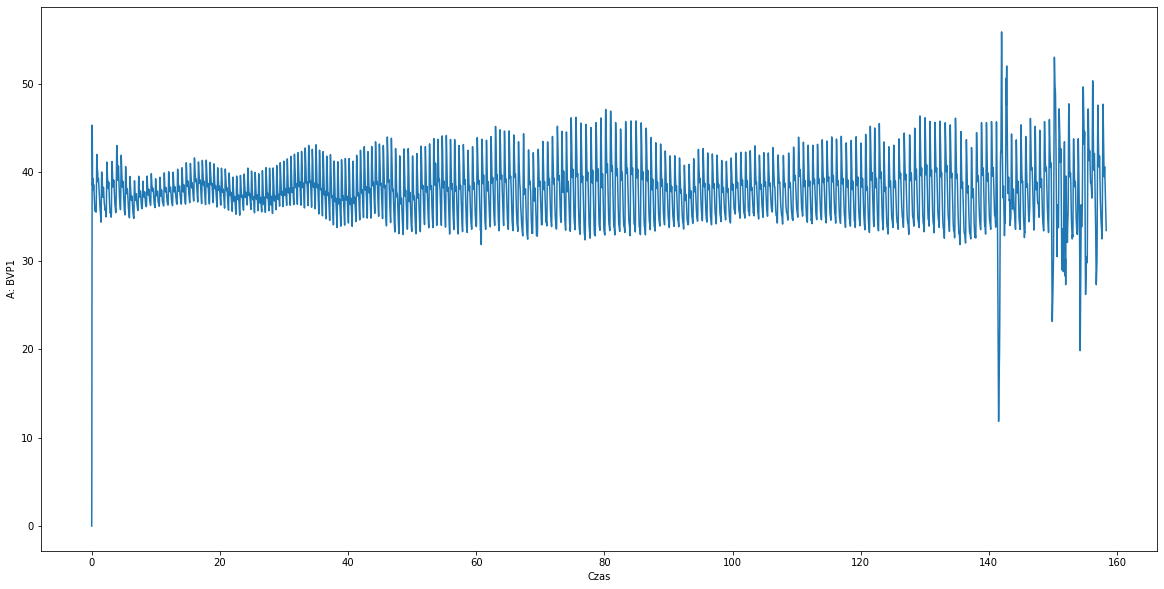

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="A: BVP1")
plt.show()

### biosignals - B: BVP2 (Player 2)

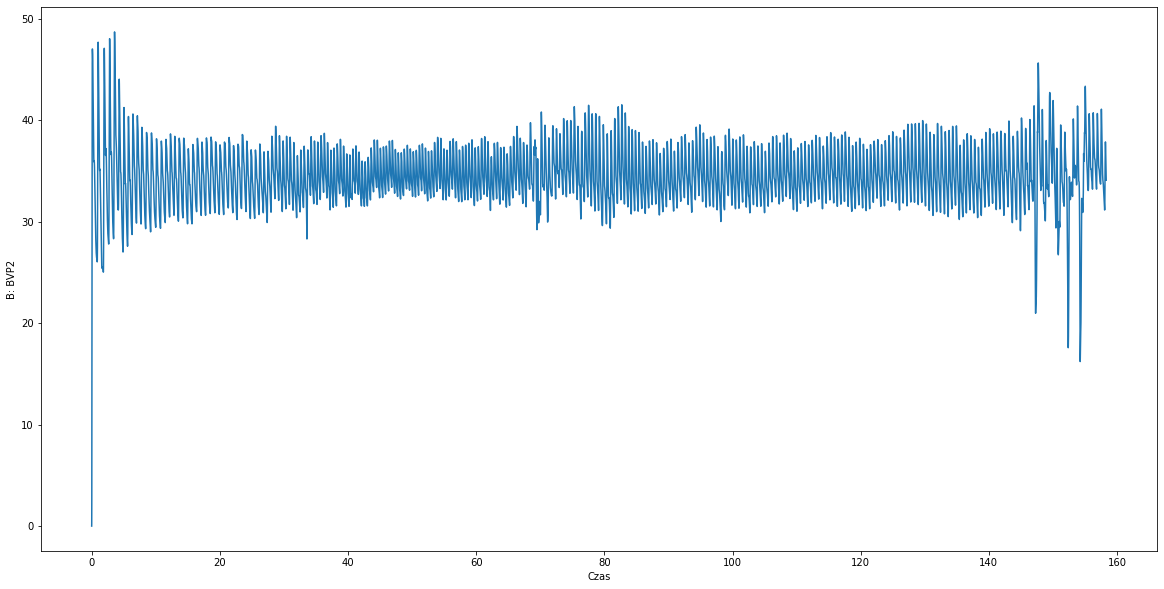

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="B: BVP2")
plt.show()

### biosignals - C: EMG1 (Player 1)

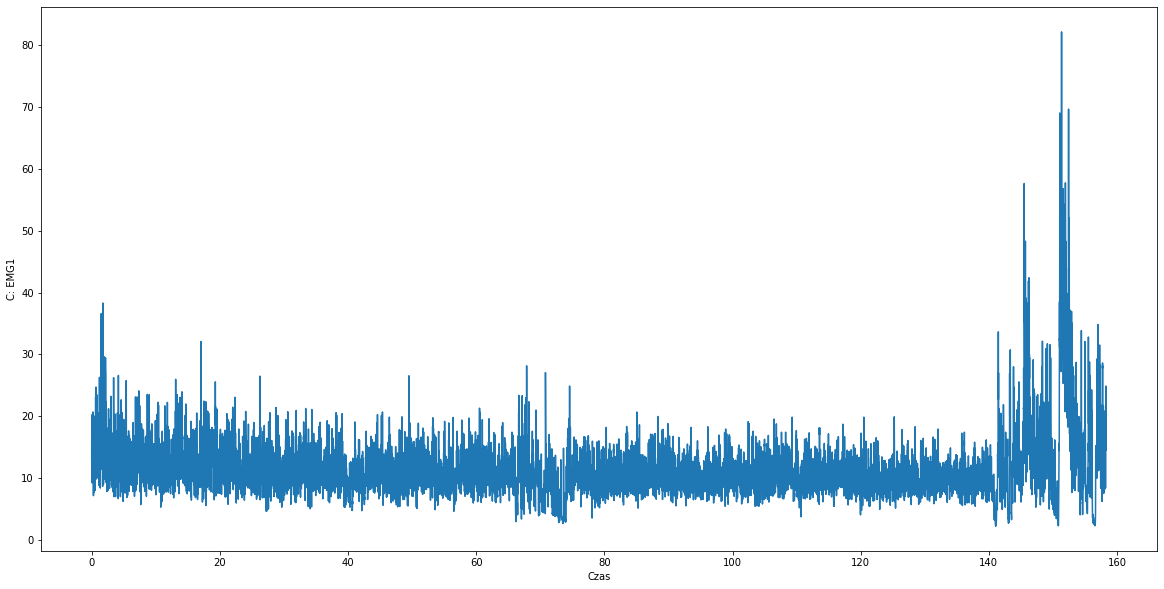

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="C: EMG1")
plt.show()

### biosignals - D: EMG2 (Player 2)

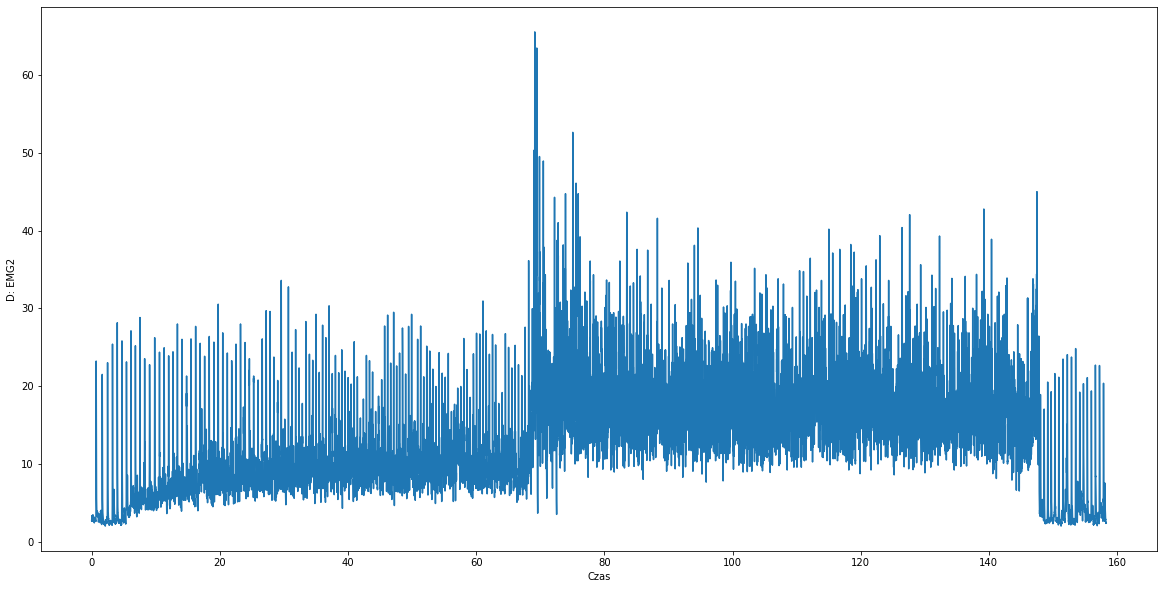

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="D: EMG2")
plt.show()

### biosignals - E: Skin Cond (Player 1)

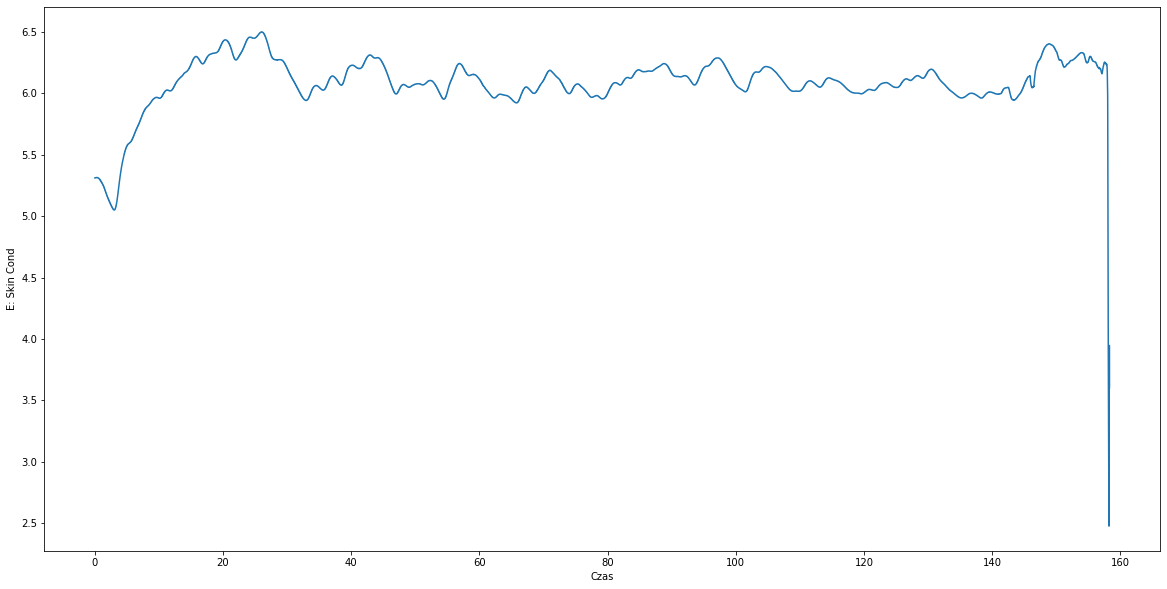

In [10]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="E: Skin Cond")
plt.show()

### biosignals - SC-Pro/Flex - 1J (Player 2)

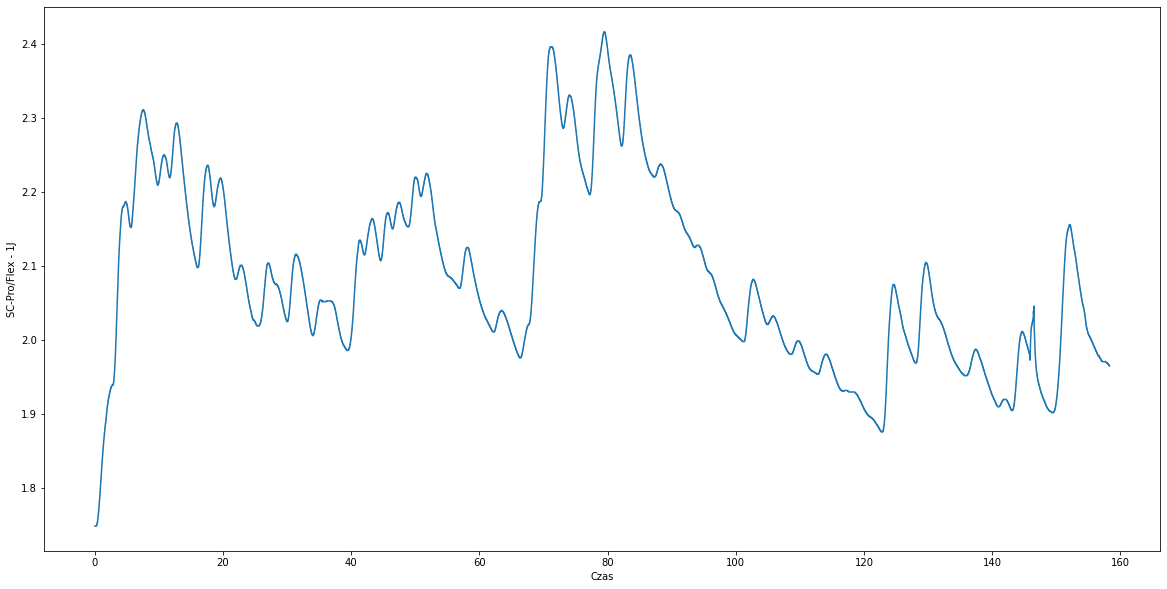

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="SC-Pro/Flex - 1J")
plt.show()


### biosignals - F: Temp1 (Player 1)

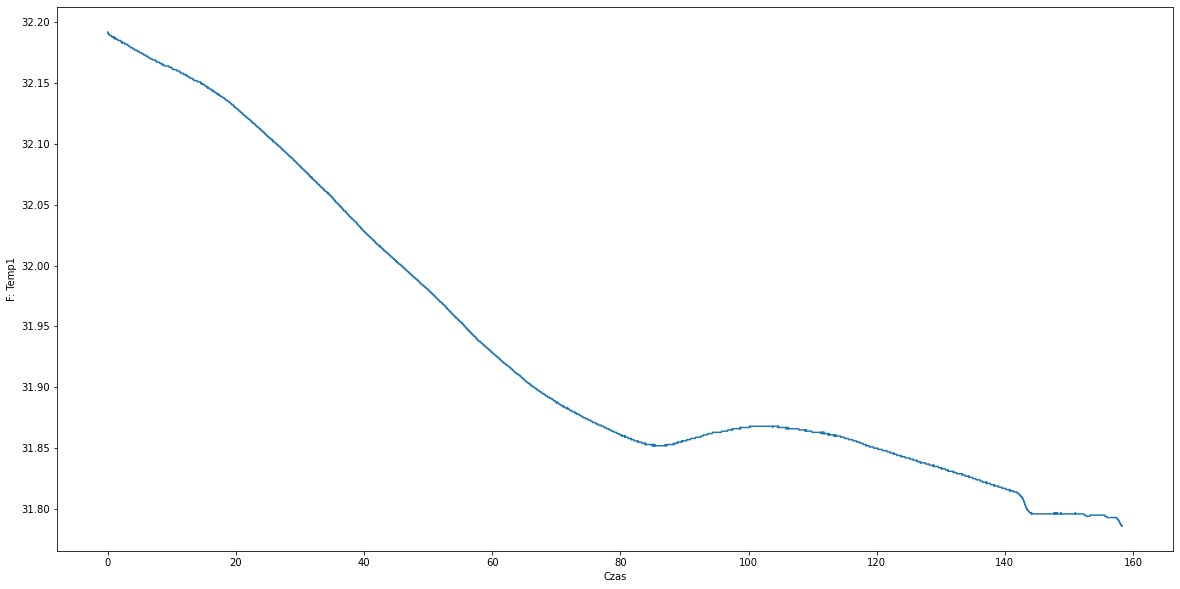

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="F: Temp1")
plt.show()

### biosignals - I: Temp2 (Player 2)

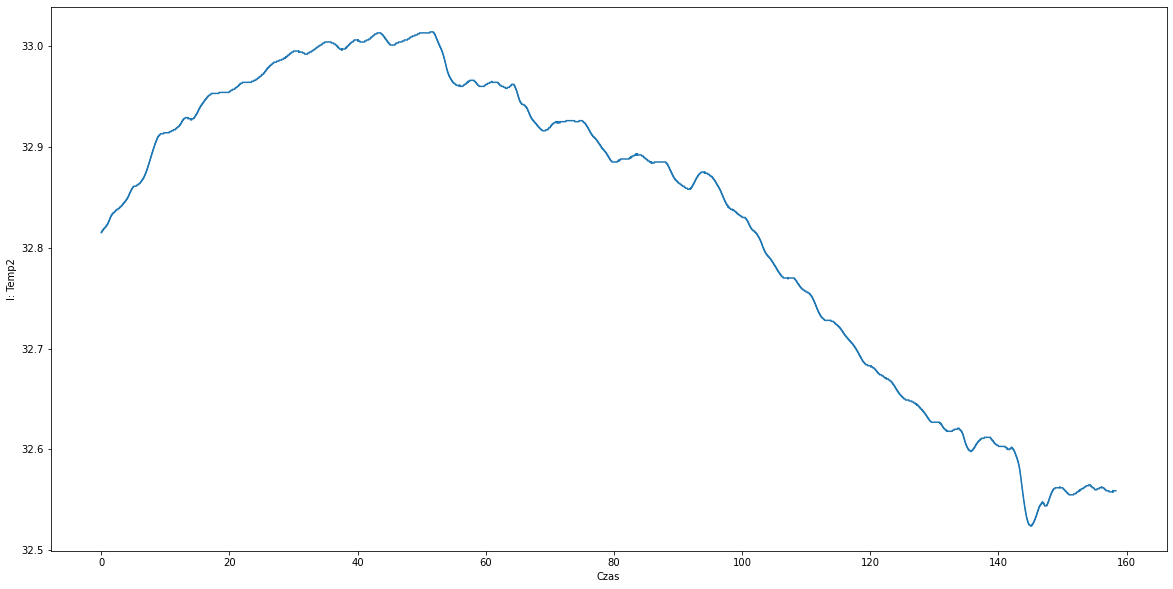

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="I: Temp2")
plt.show()

### biosignals - G: Abd Resp (Player 1)

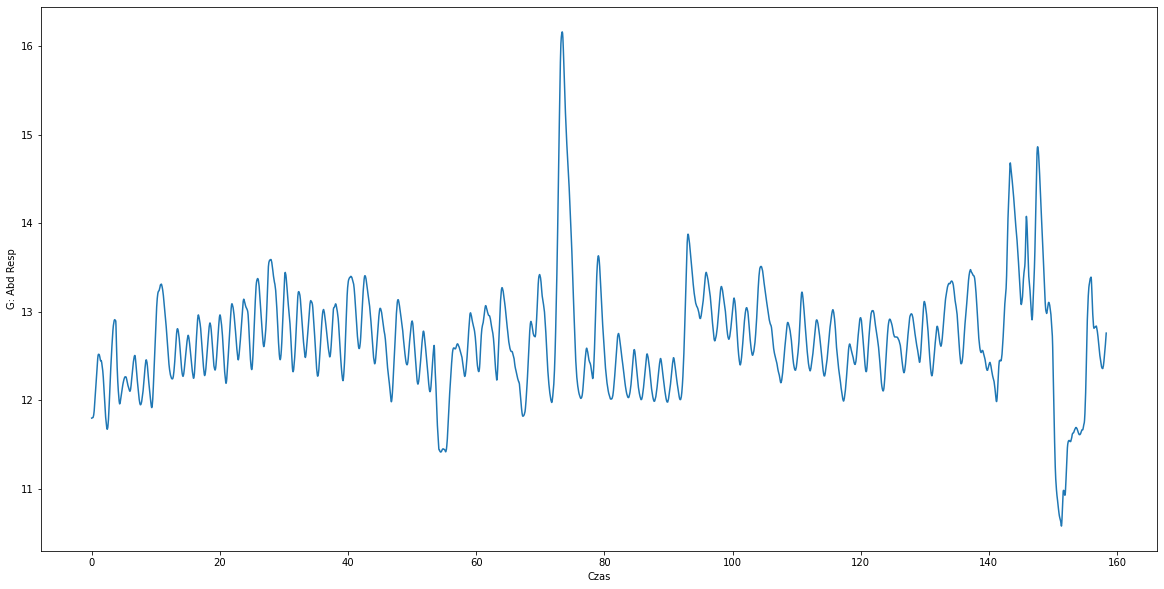

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="G: Abd Resp")
plt.show()

### biosignals - H: Thor Resp (Player 2)

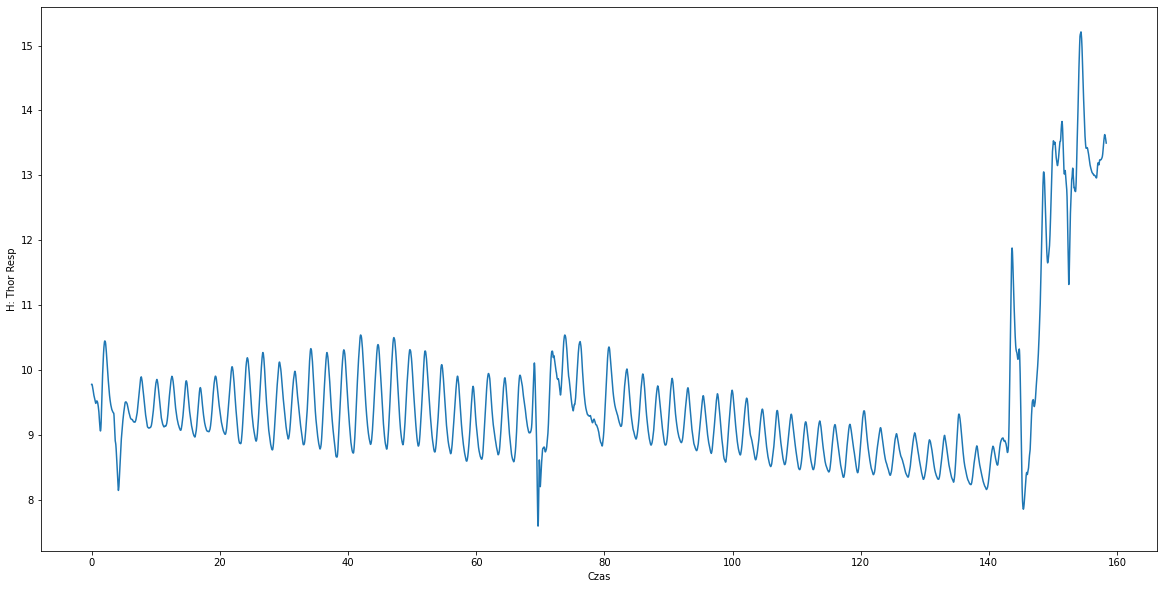

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['biosignals'], x="Czas", y="H: Thor Resp")
plt.show()

# Merged with tetris results / per round
## First round - First player

In [16]:
results['p1r1'].info()
results['p1r1']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15872 entries, 512 to 16383
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Czas          15872 non-null  float64
 1   A: BVP1       15872 non-null  float64
 2   C: EMG1       15872 non-null  float64
 3   E: Skin Cond  15872 non-null  float64
 4   F: Temp1      15872 non-null  float64
 5   G: Abd Resp   15872 non-null  float64
 6   Draw          15872 non-null  uint8  
 7   Lose          15872 non-null  uint8  
 8   Win           15872 non-null  uint8  
dtypes: float64(6), uint8(3)
memory usage: 914.5 KB


,Czas,A: BVP1,C: EMG1,E: Skin Cond,F: Temp1,G: Abd Resp,Draw,Lose,Win
512,2.000000,36.342,23.707,5.151,32.185,12.010,1,0,0
513,2.003906,36.313,21.687,5.151,32.185,12.005,1,0,0
514,2.007812,36.283,19.667,5.150,32.185,12.000,1,0,0
515,2.011719,36.252,19.356,5.150,32.185,11.995,1,0,0
516,2.015625,36.219,20.651,5.149,32.185,11.991,1,0,0
...,...,...,...,...,...,...,...,...,...
16379,63.980469,39.719,9.931,5.984,31.911,13.265,0,1,0
16380,63.984375,39.700,10.656,5.984,31.911,13.266,0,1,0
16381,63.988281,39.671,13.659,5.984,31.911,13.267,0,1,0
16382,63.992188,39.633,16.715,5.984,31.911,13.268,0,1,0


### biosignals - A: BVP1

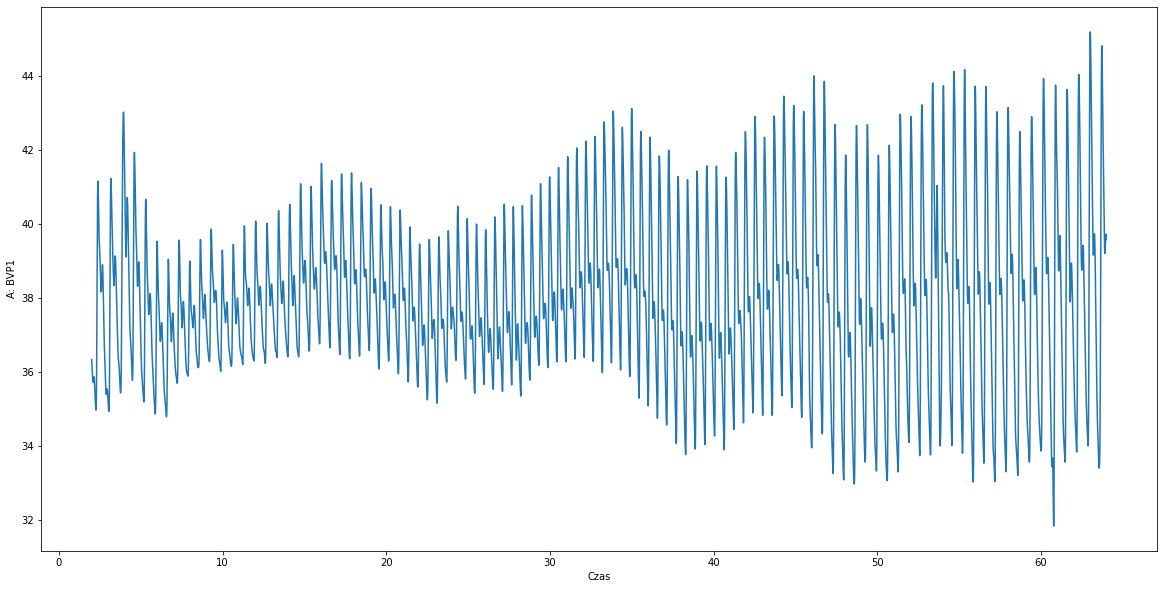

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['p1r1'], x="Czas", y="A: BVP1")
plt.show()

### biosignals - C: EMG1

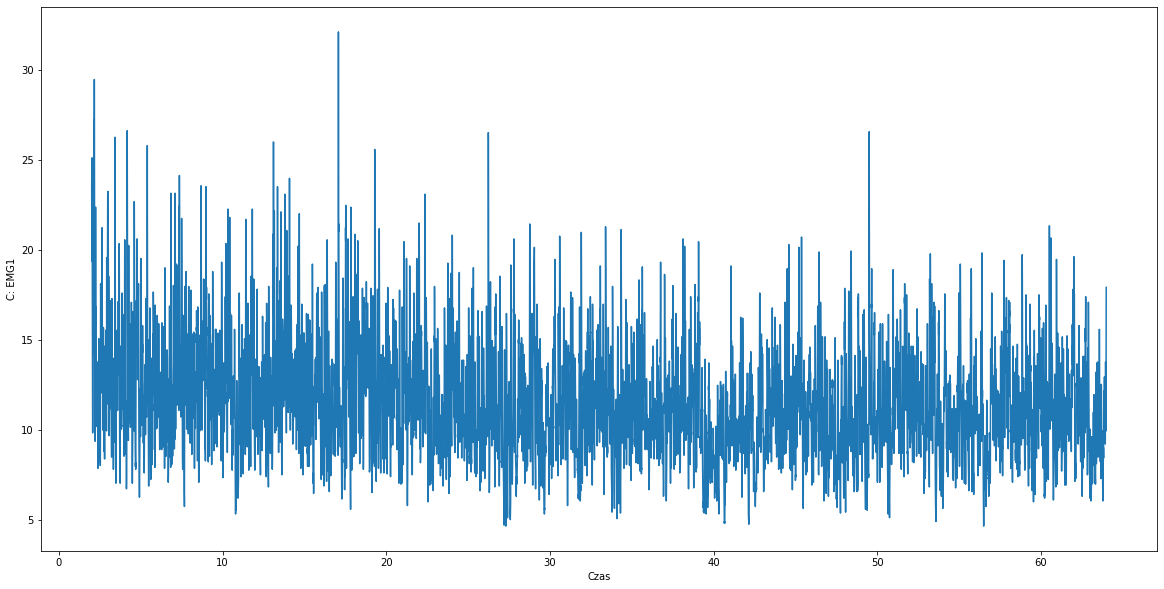

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['p1r1'], x="Czas", y="C: EMG1")
plt.show()

### biosignals - E: Skin Cond

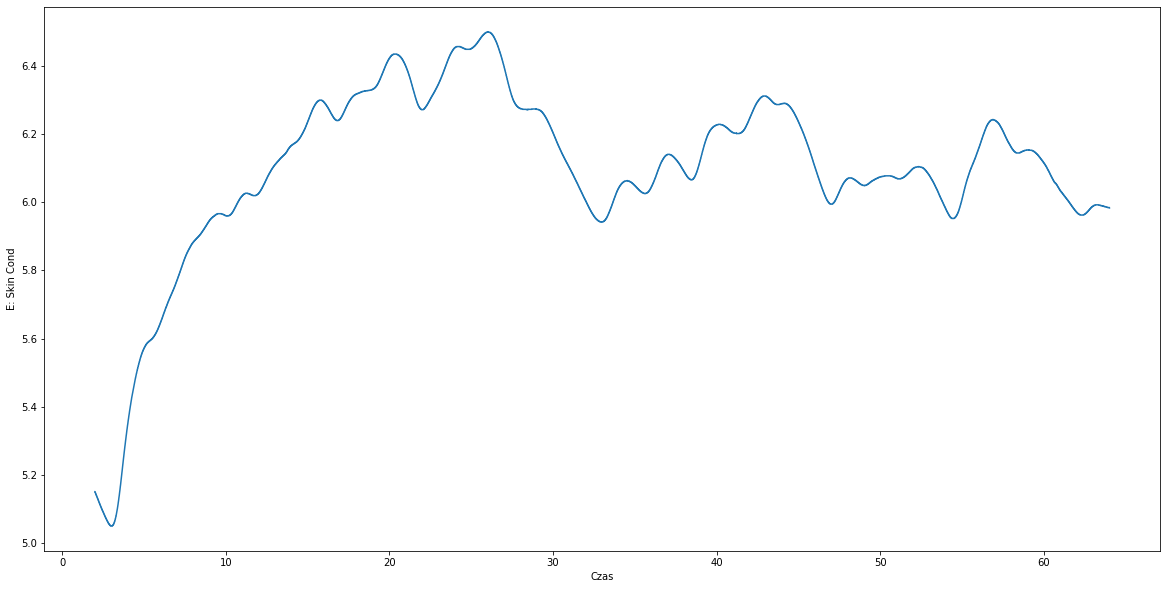

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['p1r1'], x="Czas", y="E: Skin Cond")
plt.show()

### biosignals - F: Temp1

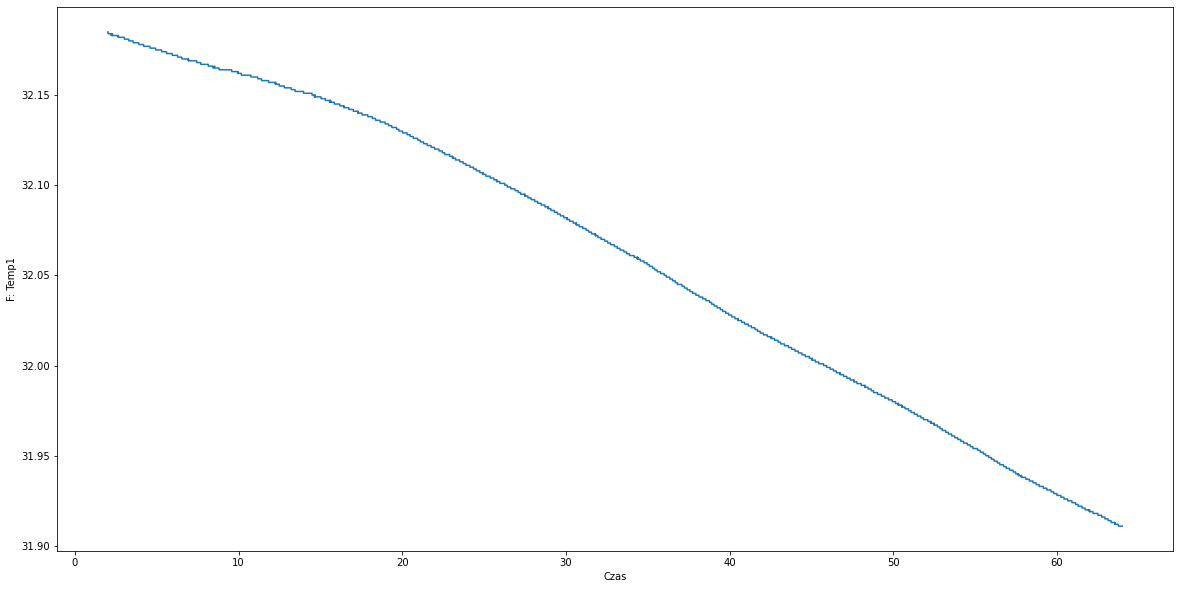

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['p1r1'], x="Czas", y="F: Temp1")
plt.show()

### biosignals - G: Abd Resp

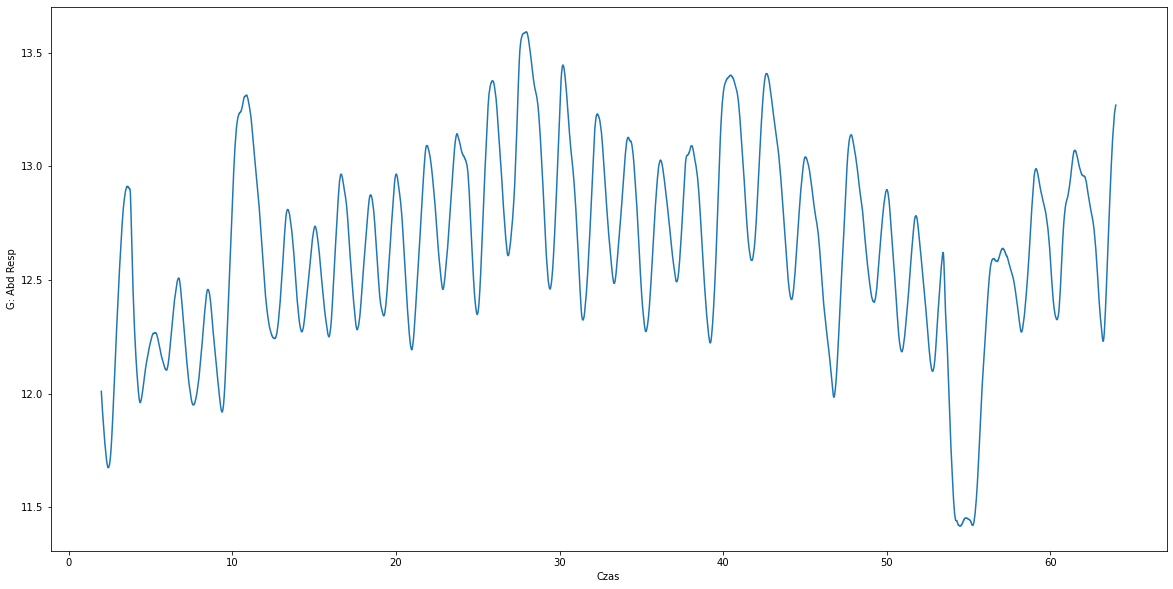

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['p1r1'], x="Czas", y="G: Abd Resp")
plt.show()


### biosignals - Win vs Draw vs Lose

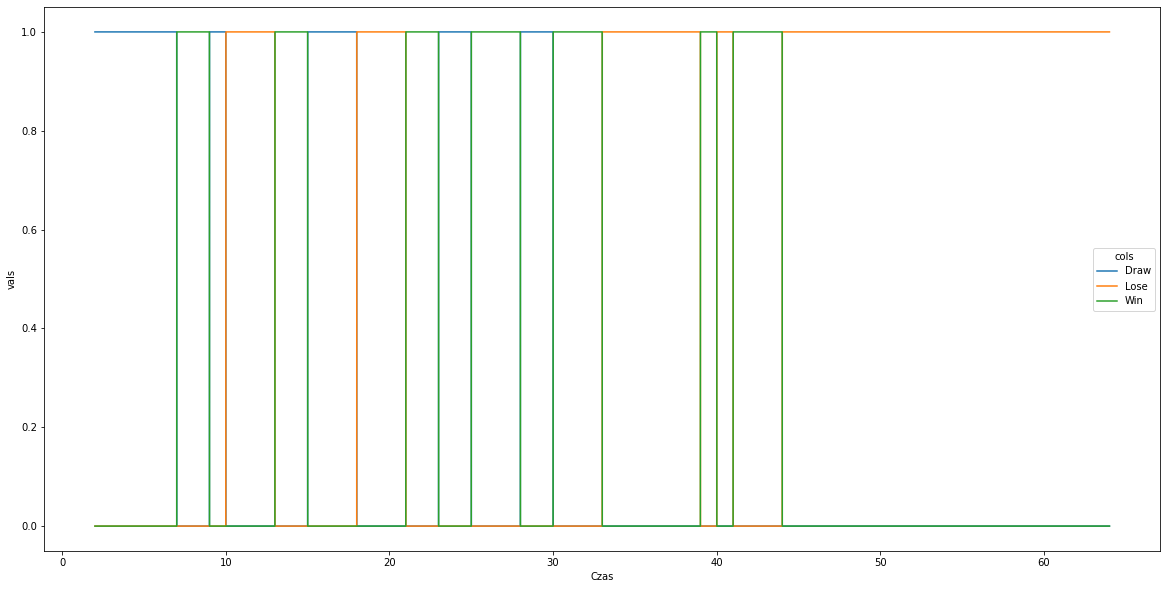

In [36]:
plt.figure(figsize=(20,10))

game_status = results['p1r1'][['Czas','Draw','Lose','Win']]

df = game_status.melt('Czas', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Czas", y="vals", hue='cols', data=df)

plt.show()

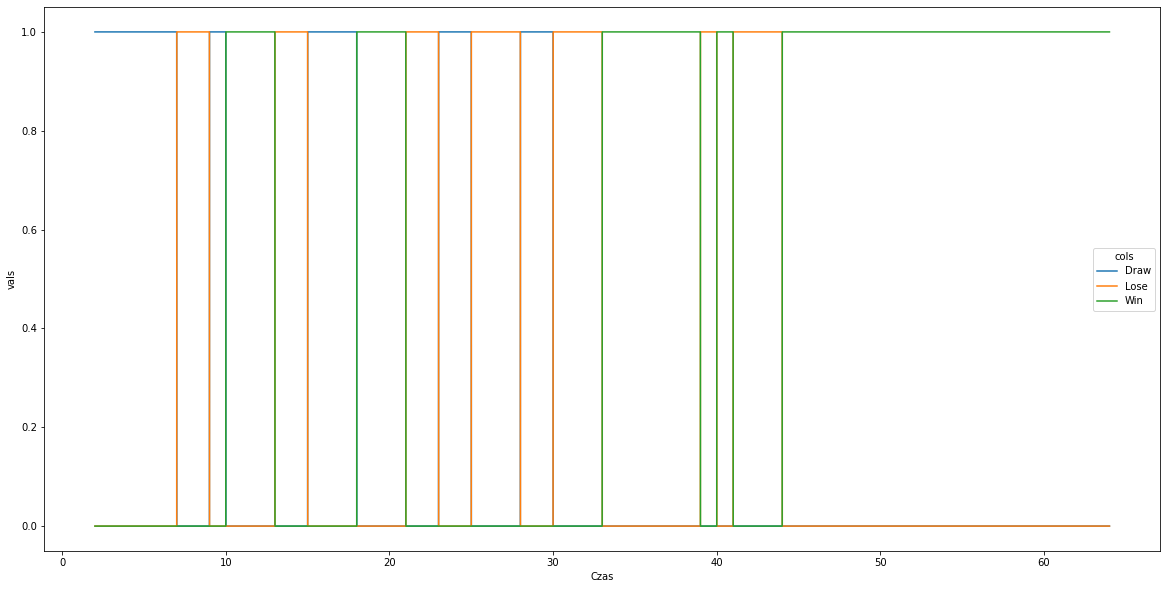

In [35]:
plt.figure(figsize=(20,10))

game_status = results['p2r1'][['Czas','Draw','Lose','Win']]

df = game_status.melt('Czas', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Czas", y="vals", hue='cols', data=df)

plt.show()